# Iris Dataset Visualization  

#### This Project involves Different type to analysis on Iris Flower and about its different spieces.

In [2]:
# importing all the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
import warnings as w

In [48]:
# w.filterwarnings("ignore")  
# To ignore unnecessary warning by interpretator 

In [15]:
# importing the data set and converting into dataframe
df = pd.read_csv('iris.csv')
print('No. of Rows the dataset    :  ' ,df.shape[0], '\nNo. of Columns the dataset :  ', df.shape[1])

No. of Rows the dataset    :   150 
No. of Columns the dataset :   5


##### >> First 10 records of our dataset

##### Checking all the names of columns present in our dataset

In [28]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [18]:
df.head(10)  # Just to check first 10 records

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


##### 10 random samples from our dataset 

In [21]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
24,4.8,3.4,1.9,0.2,setosa
96,5.7,2.9,4.2,1.3,versicolor
145,6.7,3.0,5.2,2.3,virginica
110,6.5,3.2,5.1,2.0,virginica
14,5.8,4.0,1.2,0.2,setosa
126,6.2,2.8,4.8,1.8,virginica
36,5.5,3.5,1.3,0.2,setosa
71,6.1,2.8,4.0,1.3,versicolor
45,4.8,3.0,1.4,0.3,setosa
28,5.2,3.4,1.4,0.2,setosa


##### Checking null values in all the columns

In [25]:
df.isna().sum()     # This shows our data does not contains any kind of null values.

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [38]:
for x in df.columns:                    # Checking the datatype of all the columns its
    print(x,'------',df[x].dtype)       # important to know that every columns should have correct dtype. 

sepal_length ------ float64
sepal_width ------ float64
petal_length ------ float64
petal_width ------ float64
species ------ object


##### After appling  above different steps, it has concluded that data is 100% clean and good to go for further analysis

In [14]:
df['species'].unique()  # to see all the different or unique species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

##### Statistical Overview

In [46]:
df.describe()   # This Method hepls us to check a quick statistical attributes of the dataset

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##### Finding some aggregates category wise of different spieces.  

In [49]:
print('Maximum Values of sepal Length from different speices \n',df.groupby('species')['sepal_length'].max())
print('\nMinimum Values of sepal Length from different speices \n',df.groupby('species')['sepal_length'].min())
print('\nMean Values of sepal Length from different speices \n',df.groupby('species')['sepal_length'].mean())   

Maximum Values of sepal Length from different speices 
 species
setosa        5.8
versicolor    7.0
virginica     7.9
Name: sepal_length, dtype: float64

Minimum Values of sepal Length from different speices 
 species
setosa        4.3
versicolor    4.9
virginica     4.9
Name: sepal_length, dtype: float64

Mean Values of sepal Length from different speices 
 species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length, dtype: float64


##### Checking outlier values in different columns

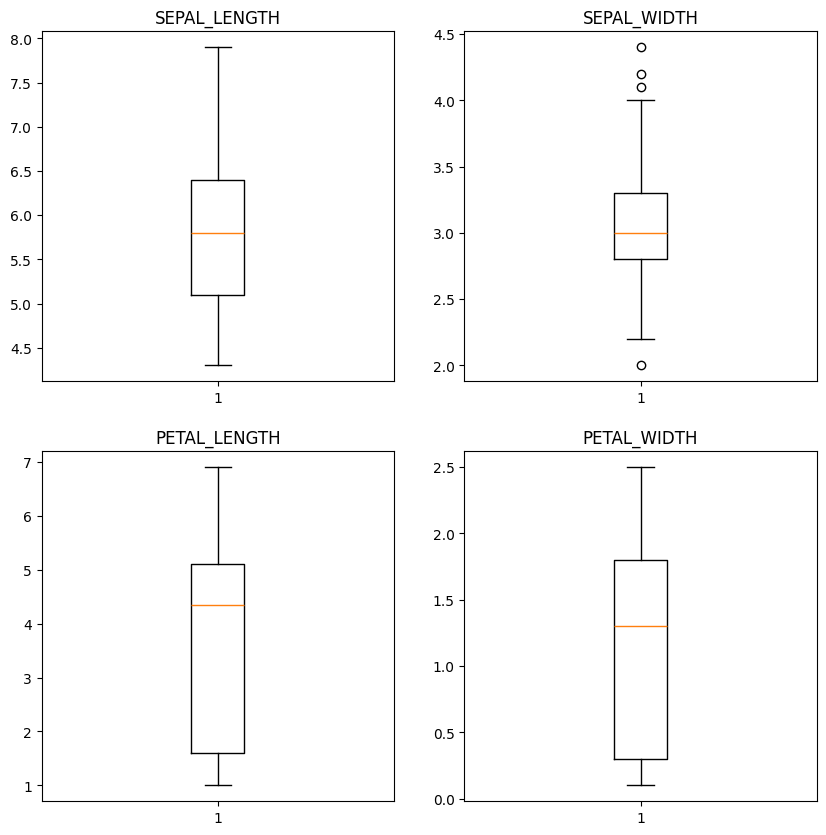

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
counter=1
for x in df.columns:
    if df[x].dtype == 'float64':
        plt.subplot(2, 2, counter)
        plt.title(x.upper())
        plt.boxplot(df[x])
        counter+=1
plt.show()


##### The Above Figure shows that Sepal_width columns contains some outlier values that needs to removed for better analysis

In [95]:
df['sepal_width'].describe()     
# By using this method we can easily identify minimum and maximum values according to IQR. 
# Any value outside this range will be treated has outlier of the data set.
# So we got our min value i.e 2.00 and max value i.e 4.40
mx_val = 4.40
mn_val = 2.00

In [103]:
# Removing outlier from the column 
def outliers(x):
    global mx_val
    global mn_val
    if x> mn_val and x<mx_val:
        return x
    else:
        return 0
df['sepal_width']= df['sepal_width'].apply(outliers)

In [104]:
df[df['sepal_width']==0]  # we have found that two values are being replaced by Zero

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,0.0,1.5,0.4,setosa
60,5.0,0.0,3.5,1.0,versicolor


In [102]:
df['sepal_width'].replace({0:df['sepal_width'].mean()})

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64